# Imports etc.

In [67]:
import json
import numpy as np
import os
import pandas as pd
import plotnine as gg
import statsmodels.formula.api as smf
gg.theme_set(gg.theme_classic)
default_figure_size = (6.4, 4.8)

In [2]:
# data_dir = 'C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1'
data_dir = 'C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34'
plot_dir = data_dir + 'figures'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

## Get all_data

In [3]:
rule_data = pd.read_csv(os.path.join(data_dir, 'rule_data.csv'), index_col=0)
rule_data.loc[rule_data.phase == 'high'][:30]

,sid,phase,goal_id,lowRules,highRules,lowTransferRules,highTransferRules,lowRulesBoth,lowRulesLearnOnly,lowRulesTransferOnly,highRulesBoth,highRulesLearnOnly,highRulesTransferOnly
0,13885,high,0,"[0, 1]","[3, 0]",NaN,"[3, 0]","[0, 1]",NaN,NaN,"[3, 0]",NaN,NaN
3,14239,high,0,"[3, 0]","[1, 0]",NaN,"[1, 3]","[3, 0]",NaN,NaN,NaN,"[1, 0]","[1, 3]"
5,15670,high,0,"[3, 0]","[0, 3]",NaN,"[0, 3]","[3, 0]",NaN,NaN,"[0, 3]",NaN,NaN
6,16849,high,0,"[1, 2]","[3, 0]",NaN,"[2, 0]","[1, 2]",NaN,NaN,NaN,"[3, 0]","[2, 0]"
9,23638,high,0,"[0, 1]","[0, 2]",NaN,"[0, 2]","[0, 1]",NaN,NaN,"[0, 2]",NaN,NaN
10,24817,high,0,"[3, 0]","[2, 0]",NaN,"[2, 3]","[3, 0]",NaN,NaN,NaN,"[2, 0]","[2, 3]"
12,24964,high,0,"[2, 3]","[1, 0]",NaN,"[1, 0]","[2, 3]",NaN,NaN,"[1, 0]",NaN,NaN
15,24979,high,0,"[2, 3]","[3, 2]",NaN,"[3, 2]","[2, 3]",NaN,NaN,"[3, 2]",NaN,NaN
17,26179,high,0,"[1, 2]","[1, 3]",NaN,"[1, 3]","[1, 2]",NaN,NaN,"[1, 3]",NaN,NaN
19,26230,high,0,"[2, 3]","[2, 0]",NaN,"[2, 0]","[2, 3]",NaN,NaN,"[2, 0]",NaN,NaN


In [4]:
all_data = pd.read_csv(os.path.join(data_dir, 'all_data.csv'), index_col=0)
all_data

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (66,67) have mixed types.Specify dtype option on import or set low_memory=False.


,rt,stimulus,key_press,trial_type,trial_index,time_elapsed,internal_node_id,phase,block,trial,...,count_star3,star_rule,star0_inplace,star1_inplace,star2_inplace,star3_inplace,sex,age_years,age_months,chance_performer
0,797.865,0.0,85.0,learning,297.0,2422963.0,0.0-77.0-0.0,high,0.0,0.0,...,0,"[2, 3]",False,False,False,False,Female,21.0,6.0,False
1,654.720,0.0,73.0,learning,298.0,2423619.0,0.0-77.0-1.0,high,0.0,0.0,...,0,"[2, 3]",False,False,False,False,Female,21.0,6.0,False
2,1317.900,0.0,79.0,learning,299.0,2424938.0,0.0-77.0-2.0,high,0.0,0.0,...,0,"[2, 3]",False,False,False,False,Female,21.0,6.0,False
3,276.305,0.0,80.0,learning,300.0,2425216.0,0.0-77.0-3.0,high,0.0,0.0,...,0,"[2, 3]",False,False,False,False,Female,21.0,6.0,False
4,823.310,0.0,85.0,learning,302.0,2426546.0,0.0-78.0-0.0,high,0.0,1.0,...,0,"[2, 3]",False,False,False,False,Female,21.0,6.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290971,NaN,NaN,NaN,transfer,NaN,NaN,NaN,low,7.0,23.0,...,0,"[2, 1]",True,True,True,True,Male,18.0,10.0,True
290972,884.860,0.0,79.0,transfer,2790.0,1240253.0,0.0-595.0-0.0,low,7.0,24.0,...,0,"[2, 1]",True,True,True,True,Male,18.0,10.0,True
290973,203.660,0.0,80.0,transfer,2791.0,1240463.0,0.0-595.0-1.0,low,7.0,24.0,...,0,"[2, 1]",True,True,True,True,Male,18.0,10.0,True
290974,262.600,0.0,73.0,transfer,2792.0,1240731.0,0.0-595.0-2.0,low,7.0,24.0,...,0,"[2, 1]",True,True,True,True,Male,18.0,10.0,True


# Results

## Data overview

In [5]:
interesting_cols = [
#     'sid',
    'trial_type', 'phase', 'block', 'trial', 'trial_', 'subtrial', 'points', 'rt', #'key_press',
    'action_id', 'action_name', 'middle_item', 'middle_item_name', 'goal_star', 'goal_star_name', 'correct', 'unlocked_star',
    'unlocked_star_name', 'timeout', 'star_iteration',
#     'middle_item_lowTransferRules', 'middle_item_lowRules', 'bool_middle_item_lowRules',
#     'unlocked_star_highTransferRules', 'unlocked_star_highRules', 'bool_unlocked_star_highRules',
    'chance_performer',
]

In [6]:
id_cols = ['sid', 'trial_type', 'phase']
all_data[interesting_cols + id_cols].groupby(id_cols[0]).mean()

,block,trial,trial_,subtrial,points,rt,action_id,middle_item,middle_item_name,goal_star,goal_star_name,correct,unlocked_star,unlocked_star_name,timeout,star_iteration,chance_performer
sid,,,,,,,,,,,,,,,,,
13885,4.700850,12.004002,129.575864,1.499750,232.461943,228.658259,1.593390,1.083166,1.385593,1.501002,1.797595,0.836036,0.274549,0.526052,1.0,1.099399,False
14239,4.697645,12.009269,129.429831,1.498998,66.400605,324.670460,1.516251,0.409712,1.556721,1.502538,1.301523,0.793722,-0.447716,-0.492386,1.0,1.098262,True
15670,4.701377,12.001001,129.612895,1.499374,237.878575,354.480074,1.526342,0.941236,1.439495,1.499497,1.699497,0.825301,0.170854,0.447236,1.0,1.099849,False
16849,4.708114,11.998242,130.113677,1.497614,262.510023,298.514588,1.511292,1.096429,1.435278,1.487730,1.190184,0.854127,0.290389,0.060327,1.0,1.108348,False
24817,4.700000,12.000000,129.500000,1.500000,234.309500,308.360629,1.535000,1.162500,1.642762,1.500000,1.600000,0.886640,0.169000,0.185000,NaN,1.100000,False
24964,4.700000,12.000000,129.500000,1.500000,61.215000,344.055750,1.513000,-0.121500,1.163507,1.500000,1.600000,0.433962,-0.732000,-0.457000,NaN,1.100000,True
24979,4.699600,12.001751,129.475213,1.499750,303.592138,275.202999,1.509264,1.292585,1.581894,1.498998,1.399800,0.901991,0.511022,0.554108,1.0,1.100150,False
26179,4.701175,11.997499,129.590841,1.499875,226.269269,310.298052,1.568068,1.044066,1.476409,1.497996,1.497996,0.886051,0.144289,0.202405,1.0,1.101101,False
26230,4.700100,12.000750,129.509765,1.499750,213.153230,300.602105,1.455684,0.664830,1.606569,1.498998,1.502004,0.871671,0.048096,0.103206,1.0,1.100150,False


In [7]:
all_data[interesting_cols].describe()

,block,trial,trial_,subtrial,points,rt,action_id,middle_item,middle_item_name,goal_star,goal_star_name,correct,unlocked_star,unlocked_star_name,timeout,star_iteration
count,223486.000000,223486.000000,222391.000000,223486.000000,222391.000000,221765.000000,222391.000000,110905.000000,78357.000000,55395.000000,55395.000000,25782.000000,55395.000000,55395.000000,626.0,222391.000000
mean,4.702666,12.006081,129.730596,1.498850,216.252088,290.658596,1.525727,0.864866,1.508493,1.497373,1.478581,0.833954,0.050366,0.161152,1.0,1.102693
std,3.194833,7.208636,80.169756,1.119064,136.746440,291.664700,1.113749,1.494851,1.118870,0.920734,1.112797,0.372129,1.286176,1.459806,0.0,0.830104
min,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,1.0,0.000000
25%,2.000000,6.000000,62.000000,0.000000,100.000000,120.085000,1.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,-1.000000,1.0,0.000000
50%,5.000000,12.000000,125.000000,1.000000,194.000000,204.110000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,1.0,1.000000
75%,7.000000,18.000000,187.000000,3.000000,310.000000,336.295000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.0,2.000000
max,11.000000,24.000000,299.000000,3.000000,702.000000,2504.040000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,3.000000,1.0,2.000000


In [8]:
all_data.loc[:30, interesting_cols]

,trial_type,phase,block,trial,trial_,subtrial,points,rt,action_id,action_name,middle_item,middle_item_name,goal_star,goal_star_name,correct,unlocked_star,unlocked_star_name,timeout,star_iteration,chance_performer
0,learning,high,0.0,0.0,0.0,0.0,23.0,797.865,0.0,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False
1,learning,high,0.0,0.0,0.0,1.0,23.0,654.720,1.0,I,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False
2,learning,high,0.0,0.0,0.0,2.0,23.0,1317.900,3.0,O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False
3,learning,high,0.0,0.0,0.0,3.0,23.0,276.305,2.0,P,-1.0,NaN,3.0,0.0,NaN,-1.0,-1.0,NaN,0.0,False
4,learning,high,0.0,1.0,1.0,0.0,23.0,823.310,0.0,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False
5,learning,high,0.0,1.0,1.0,1.0,23.0,239.845,2.0,P,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False
6,learning,high,0.0,1.0,1.0,2.0,23.0,389.015,3.0,O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False
7,learning,high,0.0,1.0,1.0,3.0,23.0,298.555,1.0,I,-1.0,NaN,3.0,0.0,NaN,-1.0,-1.0,NaN,0.0,False
8,learning,high,0.0,2.0,2.0,0.0,23.0,42.995,0.0,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False
9,learning,high,0.0,2.0,2.0,1.0,23.0,344.920,3.0,O,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False


## How many people in which condition(s)?

In [9]:
high_dat = all_data.loc[all_data['phase'] == 'high', ['sid', 'phaseNum', 'key_press']]
high_dat['hand'] = high_dat['key_press'].apply(lambda x : 'right in high' if x in [69, 81, 82, 87] else 'right in low')
high_sum_dat = high_dat.groupby(['sid', 'phaseNum', 'hand']).aggregate('mean').reset_index().dropna().drop(columns=['key_press'])
high_sum_dat['order'] = high_sum_dat['phaseNum'].apply(lambda x : 'high first' if x == 0 else 'low first')
high_sum_dat

,sid,phaseNum,hand,order
0,13885,0.0,right in low,high first
1,14239,1.0,right in high,low first
3,15670,1.0,right in high,low first
5,16849,0.0,right in low,high first
6,24817,0.0,right in low,high first
7,24964,0.0,right in high,high first
8,24979,1.0,right in high,low first
10,26179,1.0,right in low,low first
11,26230,1.0,right in low,low first
12,26641,0.0,right in low,high first


In [10]:
# Read out numbers
high_sum_dat['count'] = 1
high_sum_dat.groupby(['hand', 'order']).aggregate('sum').reset_index().drop(columns=['sid', 'phaseNum'])

,hand,order,count
0,right in high,high first,12
1,right in high,low first,12
2,right in low,high first,18
3,right in low,low first,14


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 2'. Pick better value with 'binwidth'.


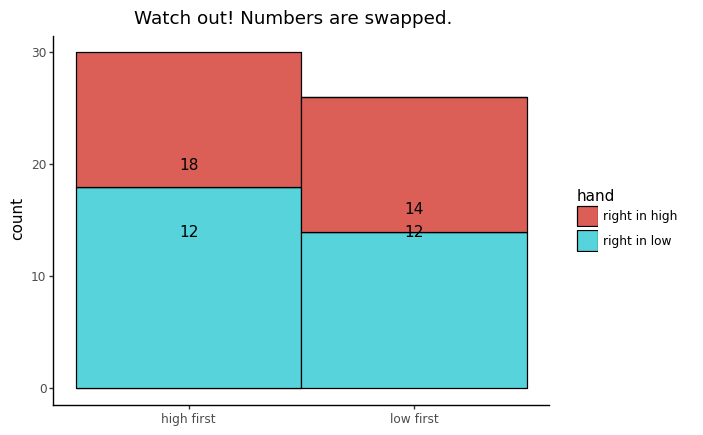

<ggplot: (145841650770)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\100_countPhasenumAndHand.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 2'. Pick better value with 'binwidth'.


In [11]:
g = (gg.ggplot(high_sum_dat, gg.aes('order', fill='hand'))
     + gg.geom_histogram(color='black')
     + gg.geom_text(gg.aes(label='stat(count)'), stat='count', nudge_y=2, va='center')
     + gg.labs(x='', title='Watch out! Numbers are swapped.')
    )
print(g)
g.save(os.path.join(plot_dir, '100_countPhasenumAndHand.png'))

## Task Duration

Number of participants: 56
Mean duration: 36.0 minutes (min: 26.0; max: 46.0; sd: 5.3)


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\0_TaskDuration_all.png


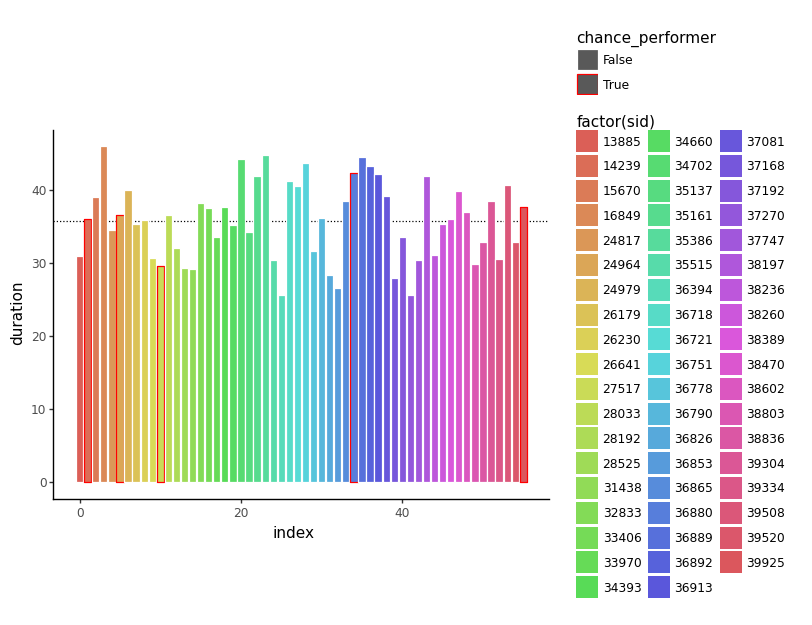

<ggplot: (145842339597)>


In [12]:
dur_dat = all_data.groupby(['sid', 'chance_performer']).aggregate('mean').reset_index().reset_index()
print("Number of participants: {}".format(dur_dat.shape[0]))
print("Mean duration: {} minutes (min: {}; max: {}; sd: {})".format(
    np.mean(dur_dat['duration']).round(), np.min(dur_dat['duration']).round(), np.max(dur_dat['duration']).round(), np.std(dur_dat['duration']).round(1))
     )

g = (gg.ggplot(dur_dat, gg.aes('index', 'duration', fill='factor(sid)', color='chance_performer'))
     + gg.geom_hline(yintercept=np.mean(dur_dat['duration']), linetype='dotted')
     + gg.scale_color_manual(values=('white', 'red'))
     + gg.geom_bar(stat='identity')
#      + gg.theme(legend_position='none')
    )
g.save(os.path.join(plot_dir, '0_TaskDuration_all.png'))
print(g)

## Raw button presses

<ipython-input-13-e5170ccf86db>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 20 x 10 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\0_RawKeyPresses.png


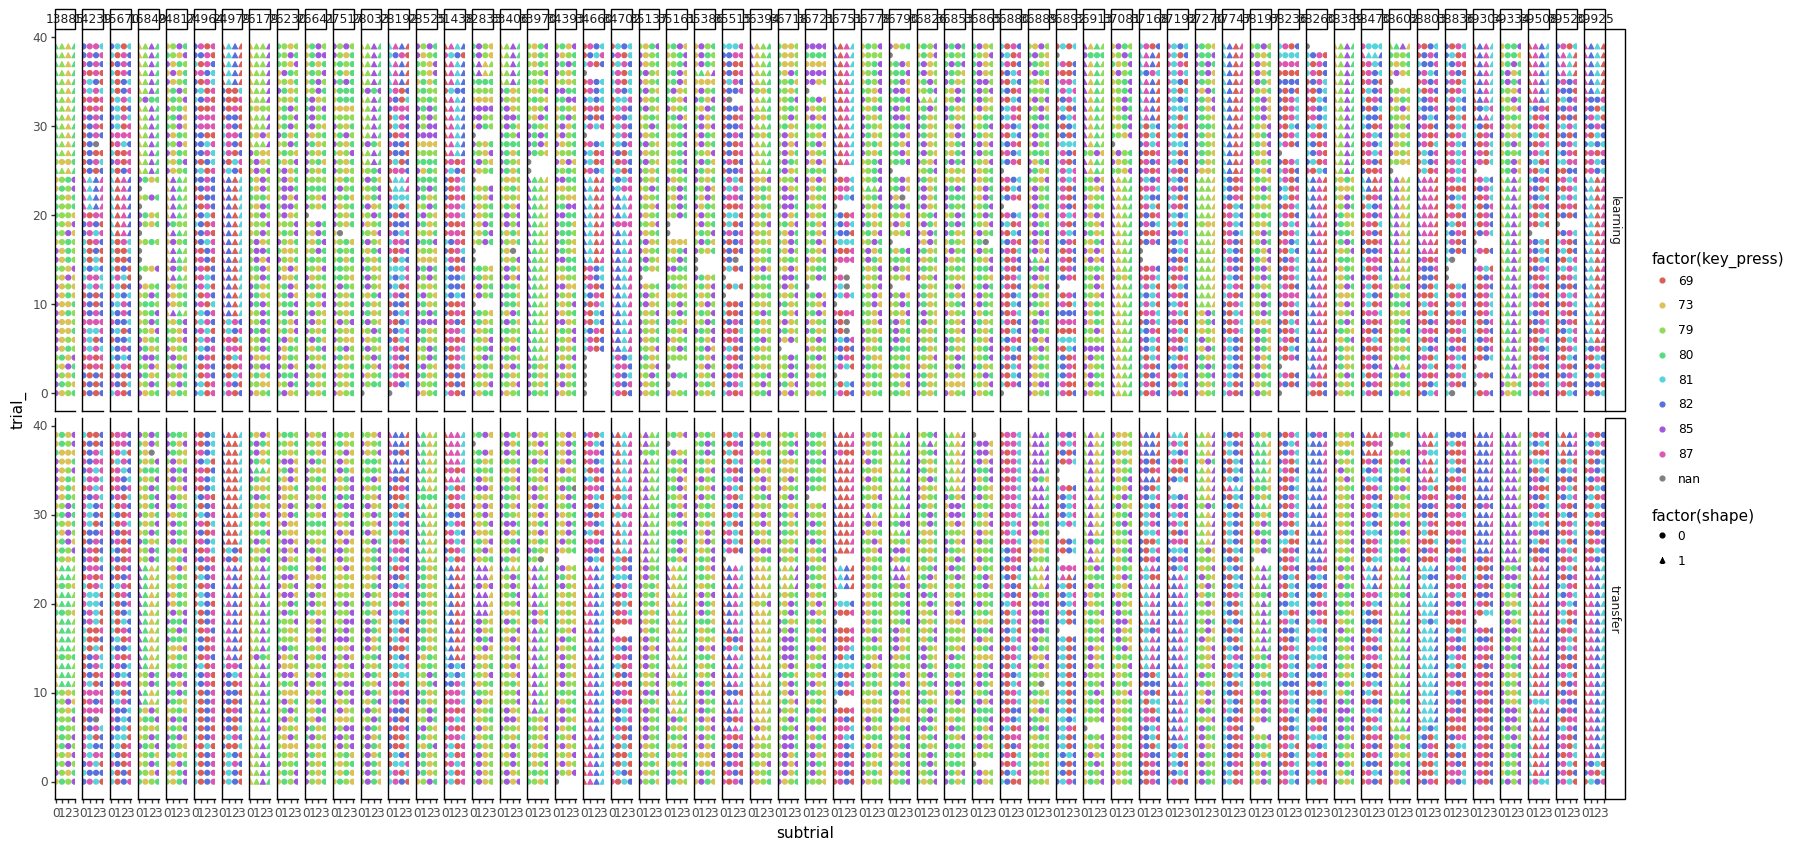

<ggplot: (145841650161)>


In [13]:
# Get data
sub_dat = all_data.loc[
    (all_data.phase == 'high') &
    (all_data.trial_ < 40) #& np.invert(np.isnan(all_data.key_press))
]
sub_dat['shape'] = sub_dat['acc'].apply(lambda x: 0 if np.isnan(x) or x == 0 else 1)

# Plot
gg.options.figure_size = (20, 10)
g = (gg.ggplot(sub_dat, gg.aes('subtrial', 'trial_', color='factor(key_press)', shape='factor(shape)'))
     + gg.geom_point()
     + gg.facet_grid('trial_type ~ sid', scales='free_x')
    )
g.save(os.path.join(plot_dir, '0_RawKeyPresses.png'))
print(g)
gg.options.figure_size = default_figure_size

## Points won over time

In [37]:
sub_dat = all_data.loc[
    (all_data['trial_'] == 199) & (all_data['trial_type'] == 'transfer') & (all_data['subtrial'] == 3),
    ['sid', 'phase', 'points']
]
sub_dat

,sid,phase,points
3198,13885,high,230.0
3997,13885,low,487.0
7192,14239,high,207.0
7989,14239,low,45.0
11186,15670,high,443.0
...,...,...,...
279035,39508,low,325.0
286186,39520,high,191.0
286983,39520,low,460.0
290176,39925,high,236.0


In [39]:
fin_dat = sub_dat.groupby(['sid']).aggregate('max').reset_index()
fin_dat

,sid,phase,points
0,13885,low,487.0
1,14239,low,207.0
2,15670,low,443.0
3,16849,low,494.0
4,24817,low,485.0
5,24964,low,113.0
6,24979,low,625.0
7,26179,low,475.0
8,26230,low,410.0
9,26641,low,400.0


In [40]:
np.mean(fin_dat['points']), np.min(fin_dat['points']), np.max(fin_dat['points']), np.std(fin_dat['points'])

(426.44642857142856, 106.0, 702.0, 135.14224247632794)

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 8 x 4 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\0_PointsOverTrials_all.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\geoms\geom_path.py:75: PlotnineWarning: geom_path: Removed 565 rows containing missing values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\geoms\geom_path.py:75: PlotnineWarning: geom_path: Removed 565 rows containing missing values.


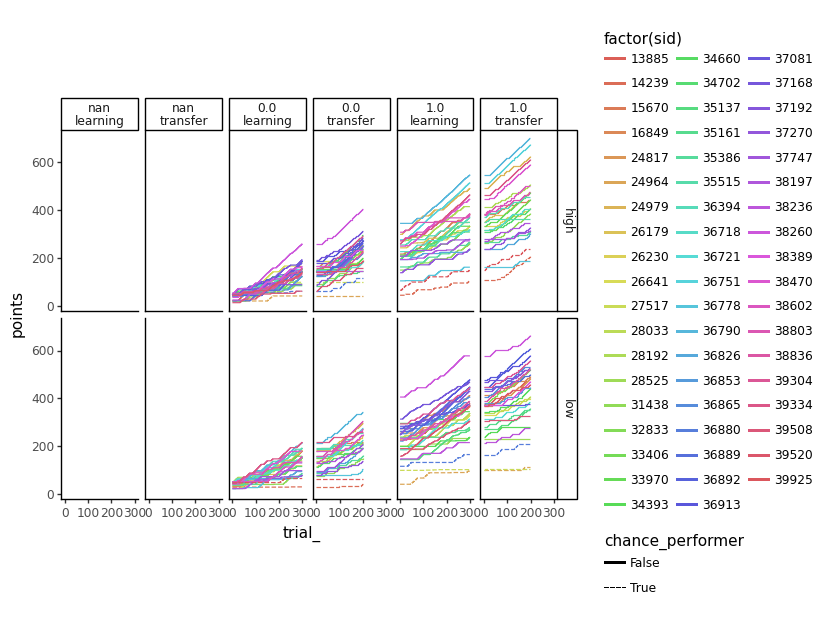

<ggplot: (145842495862)>

In [14]:
def plot_PointsOverTrials(dat, suf=''):
    
    gg.options.figure_size = (8, 4)
    g = (gg.ggplot(dat, gg.aes('trial_', 'points', color='factor(sid)', linetype='chance_performer'))
         + gg.geom_line()
         + gg.facet_grid('phase ~ phaseNum + trial_type')
        )
    g.save(os.path.join(plot_dir, '0_PointsOverTrials{}.png'.format(suf)))
    gg.options.figure_size = default_figure_size

    return g

# Use
# plot_PointsOverTrials(incl_data)
plot_PointsOverTrials(all_data, '_all')

## Accuracy after first and last block

In [54]:
sub_dat = all_data.loc[
    (all_data['trial_type'] == 'learning') & (all_data['block'].isin([0, 11]) & (all_data['trial'] == 24))
]
sum_dat = sub_dat.groupby(['sid', 'trial_type', 'block']).aggregate('mean').reset_index()[['sid', 'trial_type', 'block', 'acc']]
sum_dat.groupby(['trial_type', 'block']).aggregate('mean').reset_index()

,trial_type,block,sid,acc
0,learning,1.0,33454.160714,0.109091


In [28]:
# Probability of finding the correct 4-key sequence after n trials when systematically trying a different sequence at each trial
n = 75
p = 0

for denom in np.arange(257-n, 257):
    p += 1/denom
    
print(p)

0.345872379377829


In [29]:
# Probability of finding the correct 4-key sequence after n trials when randomly sequences on each trial
n = 75
p = n/265

print(p)

0.2830188679245283


## Response times

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 490 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 490 rows containing non-finite values.


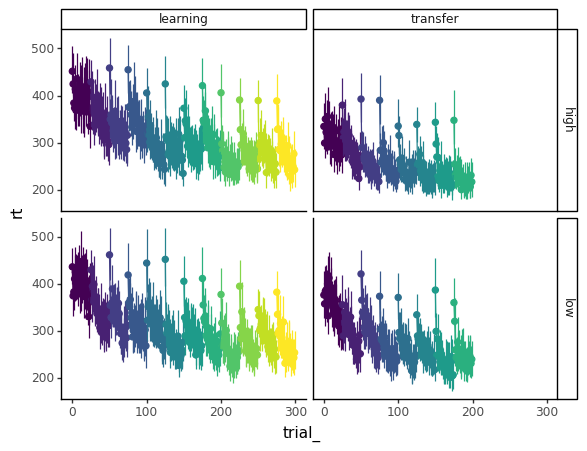

<ggplot: (145854609878)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\100_RtOverTrial.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 490 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 490 rows containing non-finite values.


In [15]:
subj_dat = all_data.groupby(['sid', 'phase', 'trial_type', 'trial_']).aggregate('mean').reset_index()

g = (gg.ggplot(subj_dat, gg.aes('trial_', 'rt', color='block', group='block'))
     + gg.stat_summary()
     + gg.stat_summary(geom='line')
     + gg.theme(legend_position='none')
     + gg.facet_grid('phase ~ trial_type')
    )
print(g)
g.save(os.path.join(plot_dir, '100_RtOverTrial.png'))

In [16]:
# g += gg.aes(y='z_rt')
# g

## Performance for each star

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\3_PerformanceByStar_all.png


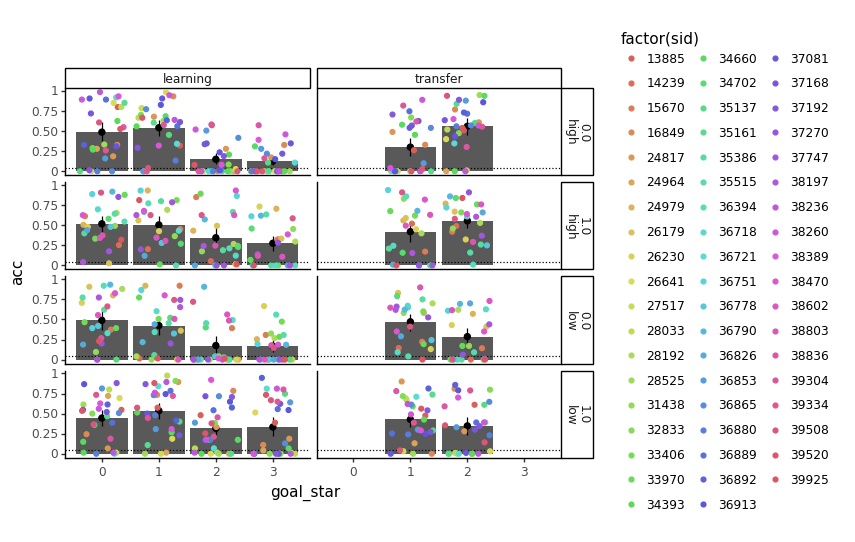

<ggplot: (145843116644)>

In [17]:
def plot_PerformanceByStar(dat, suf=''):
    
    id_cols = ['sid', 'phase', 'phaseNum', 'trial_type', 'goal_star']
    sum_dat = dat.groupby(id_cols).mean().reset_index()[id_cols + ['acc']]
    
    chance_perf = 1 / (4 * 3 * 2)
    g = (gg.ggplot(sum_dat, gg.aes('goal_star', 'acc'))
         + gg.stat_summary(geom='bar')
         + gg.stat_summary()
         + gg.geom_hline(yintercept=chance_perf, linetype='dotted')
         + gg.geom_point(gg.aes(color='factor(sid)'), position='jitter')
         + gg.facet_grid('phase + phaseNum ~ trial_type')
        )
    g.save(os.path.join(plot_dir, '3_PerformanceByStar{}.png'.format(suf)))
    
    return g

# Use
plot_PerformanceByStar(all_data, '_all')

## Learning curves

In [69]:
sub_dat = all_data.loc[
    (all_data['trial_type'] == 'learning') & (all_data['block'].isin([8, 9, 10, 11]) & (all_data['trial'] == 24))
]
sum_dat = sub_dat.groupby(['sid', 'trial_type', 'block']).aggregate('mean').reset_index()[['sid', 'trial_type', 'block', 'acc']]
sum_dat.groupby(['trial_type']).aggregate('mean').reset_index()

,trial_type,sid,block,acc
0,learning,33454.160714,9.5,0.564732


In [72]:
sub_dat = all_data.loc[
    (all_data['trial_type'] == 'learning') & (all_data['trial'] == 24) & (all_data['subtrial'] == 3),
    ['sid', 'phase', 'star_iteration', 'goal_star', 'acc']
].dropna()
sub_dat

,sid,phase,star_iteration,goal_star,acc
99,13885,high,0.0,3.0,0.0
199,13885,high,0.0,2.0,0.0
299,13885,high,0.0,1.0,0.0
399,13885,high,0.0,0.0,1.0
499,13885,high,1.0,1.0,0.0
...,...,...,...,...,...
288976,39925,low,1.0,3.0,0.0
289076,39925,low,2.0,0.0,1.0
289176,39925,low,2.0,3.0,0.0
289276,39925,low,2.0,1.0,0.0


In [73]:
predictors = [
    '1',
    'star_iteration',
    'star_iteration * goal_star * phase',
]

for pred in predictors:
    mod = smf.mixedlm(formula='acc ~ {}'.format(pred), data=sub_dat, groups=sub_dat['sid']).fit()
    print(mod.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: acc      
No. Observations: 1331    Method:             REML     
No. Groups:       56      Scale:              0.2318   
Min. group size:  22      Log-Likelihood:     -947.5251
Max. group size:  24      Converged:          Yes      
Mean group size:  23.8                                 
-------------------------------------------------------
              Coef. Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     0.475    0.022 21.357 0.000  0.432  0.519
Group Var     0.018    0.011                           

         Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: acc      
No. Observations:  1331    Method:             REML     
No. Groups:        56      Scale:              0.2253   
Min. group size:   22      Log-Likelihood:     -932.1102
Max. group size:   24      Converged:          Yes      
Mean

In [ ]:
# Learning curves, averaging over goal stars 
subj_dat = all_data.groupby(['sid', 'trial_', 'phase', 'trial_type']).aggregate('mean').reset_index()

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 605 rows containing non-finite values.


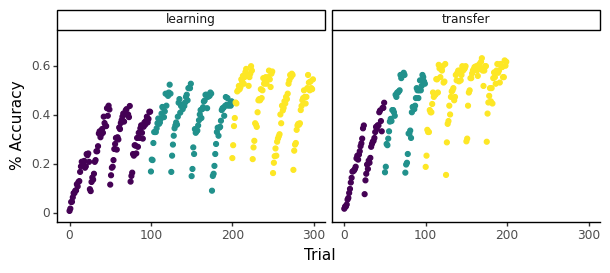

<ggplot: (145871850629)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 7 x 2.5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\100_LearnCurvesOverTrial.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 605 rows containing non-finite values.


In [74]:
gg.options.figure_size = (7, 2.5)
learn_curves = (
    gg.ggplot(subj_dat, gg.aes('trial_', 'acc', color='star_iteration', group='star_iteration'))
     + gg.stat_summary(geom='point')
#      + gg.stat_summary(geom='line')
     + gg.theme(legend_position='none')
     + gg.labs(x='Trial', y='% Accuracy')
     + gg.facet_grid(' ~ trial_type')
    )
print(learn_curves)
learn_curves.save(os.path.join(plot_dir, '100_LearnCurvesOverTrial.png'))

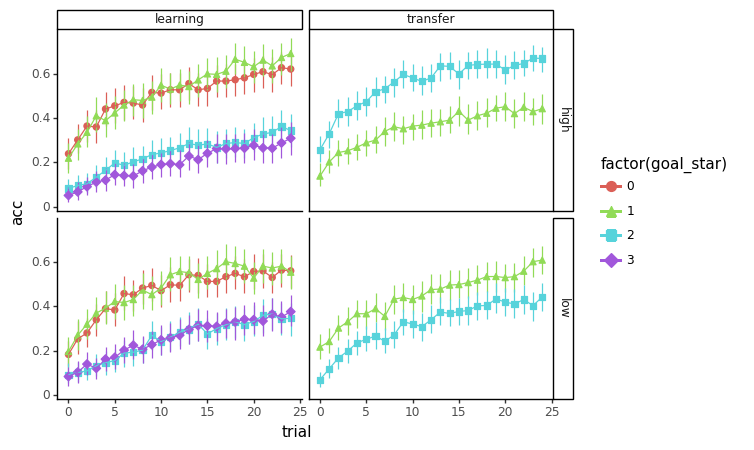

<ggplot: (145858006709)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\100_LearnCurvesOverTrialByStar.png


In [19]:
# Learning curves, trial-by-trial
subj_dat = all_data.groupby(['sid', 'trial_', 'phase', 'trial_type', 'goal_star']).aggregate('mean').reset_index()

learn_curves += gg.aes(x='trial', color='factor(goal_star)')
learn_curves.data = subj_dat

print(learn_curves)
learn_curves.save(os.path.join(plot_dir, '100_LearnCurvesOverTrialByStar.png'))

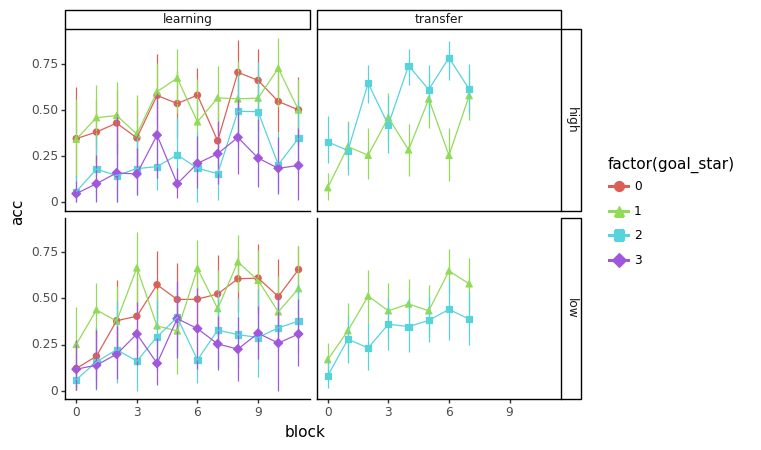

<ggplot: (145858006709)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\100_LearnCurvesOverBlockByStar.png


In [20]:
subj_dat = all_data.groupby(['sid', 'block', 'phase', 'trial_type', 'goal_star']).aggregate('mean').reset_index()

learn_curves += gg.aes(x='block', color='factor(goal_star)')
learn_curves.data = subj_dat
print(learn_curves)
learn_curves.save(os.path.join(plot_dir, '100_LearnCurvesOverBlockByStar.png'))

## More basics

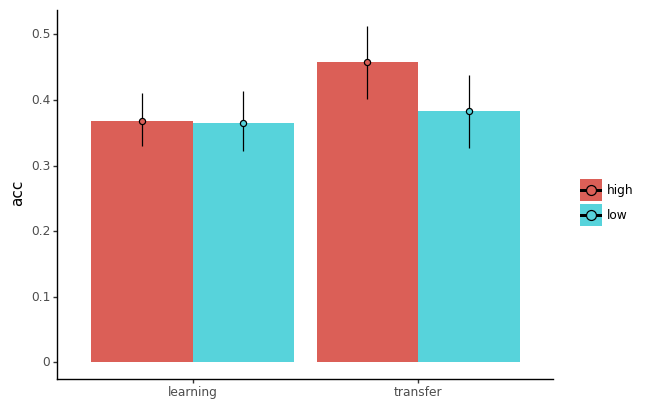

<ggplot: (145841650137)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\100_AccForEachPhase.png


In [21]:
subj_dat = all_data.groupby(['sid', 'trial_type', 'phase']).aggregate('mean').reset_index()

g = (gg.ggplot(subj_dat, gg.aes('trial_type', 'acc', fill='phase'))
     + gg.stat_summary(geom='bar', position=gg.position_dodge(width=0.9))
     + gg.stat_summary(position=gg.position_dodge(width=0.9))
     + gg.labs(x='', fill='')
#      + gg.facet_grid('~ phaseNum', labeller='label_both')
    )
print(g)
g.save(os.path.join(plot_dir, '100_AccForEachPhase.png'))

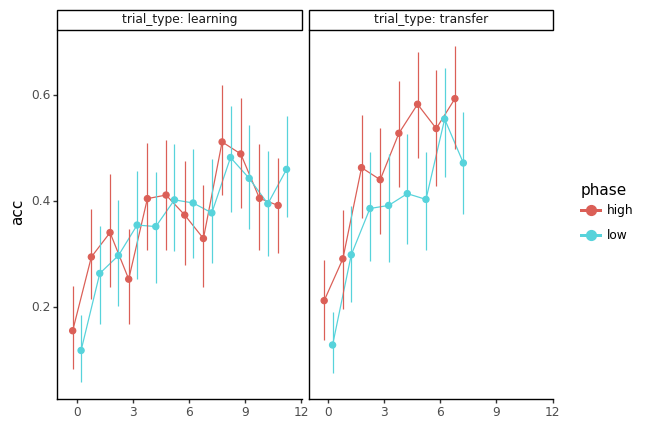

<ggplot: (145842575839)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\100_AccOverBlock.png


In [22]:
subj_dat = all_data.groupby(['sid', 'trial_type', 'phase', 'block']).aggregate('mean').reset_index()

g = (gg.ggplot(subj_dat, gg.aes('block', 'acc', color='phase'))
     + gg.stat_summary(geom='line', position=gg.position_dodge(width=0.9))
     + gg.stat_summary(position=gg.position_dodge(width=0.9))
     + gg.labs(x='', fill='')
     + gg.facet_grid(' ~ trial_type', labeller='label_both')
    )
print(g)
g.save(os.path.join(plot_dir, '100_AccOverBlock.png'))